In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [16]:
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':1,
                   #MTH parameters
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.3,
                   'ratio_vev_twin':8,
                  # 'YHE_twin':'BBN'
                   }  
##############
#    
# call CLASS
#
###############
M = Class()
M.set(common_settings)
M.compute()
derived = M.get_current_derived_parameters(['tau_rec','conformal_age'])
thermo = M.get_thermodynamics()
print (thermo.keys())

['x_e_twin', 'tau_idm_dr', 'x_e', 'dmu_idm_dr', 'w_b', 'dTb [K]', 'g [Mpc^-1]', "kappa' [Mpc^-1]", 'tau_d', "kappa_twin'", 'c_b_twin^2', 'conf. time [Mpc]', 'tau_d_twin', 'dmu_idr', 'Tb_twin', 'g_twin', 'Tb [K]', 'T_idm_dr', 'c_b^2', 'c_idm_dr^2', 'g_idm_dr [Mpc^-1]', 'tau_idr', 'exp(-kappa)', 'z']


In [21]:
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':1,
                   #MTH parameters
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'ratio_vev_twin':3,
                  # 'YHE_twin':'BBN'
                   }  
##############
#    
# call CLASS
#
###############
M1 = Class()
M1.set(common_settings)
M1.compute()
derived1 = M1.get_current_derived_parameters(['tau_rec','conformal_age'])
thermo1 = M1.get_thermodynamics()

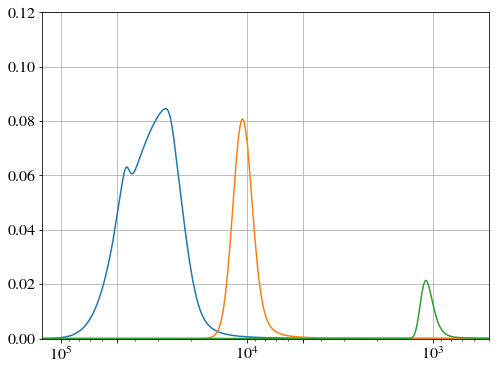

In [22]:
plt.semilogx(thermo['z'],thermo['g_twin'])
plt.semilogx(thermo1['z'],thermo1['g_twin'])

plt.semilogx(thermo['z'],thermo['g [Mpc^-1]'])
plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()

plt.xlim(5*10**2,10**5.1)
plt.ylim(0,0.12)
plt.gca().invert_xaxis()

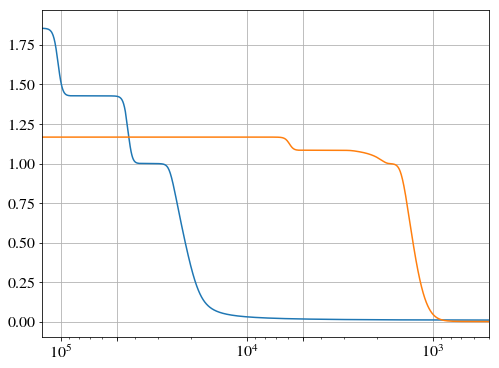

In [18]:
plt.semilogx(thermo['z'],thermo['x_e_twin'])
plt.semilogx(thermo['z'],thermo['x_e'])

plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()

plt.xlim(5*10**2,10**5.1)
plt.gca().invert_xaxis()


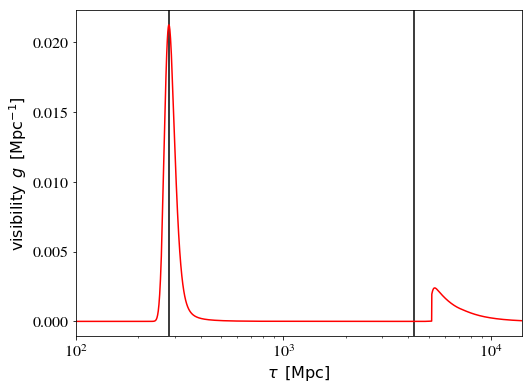

In [6]:
tau = thermo['conf. time [Mpc]']
g = thermo['g [Mpc^-1]']
# to make the reionisation peak visible, rescale g by 100 for late times
g[:500] *= 100
#################
#
# start plotting
#
#################
#    
plt.xlim([1.e2,derived['conformal_age']])
plt.xlabel(r'$\tau \,\,\, \mathrm{[Mpc]}$')
plt.ylabel(r'$\mathrm{visibility} \,\,\, g \,\,\, [\mathrm{Mpc}^{-1}]$')
plt.axvline(x=derived['tau_rec'],color='k')
# The conformal time at reionisation  could be extracted from the code.
# But we know it because it is part of the standard output
# when thermodynamics_verbose=1
plt.axvline(x=4255.316282,color='k')
#
# Print functions one by one, saving between each (for slides)
#
plt.semilogx(tau,g,'r',label=r'$\psi$')

In [ ]:
plt.savefig('thermo.pdf',bbox_inches='tight')